# Import necessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset

In [14]:
file_path = 'spotify-2023-with-cover-urls.csv'  # Update with your file path
spotify_data = pd.read_csv(file_path)

# Display basic information

In [15]:
spotify_data.info()
spotify_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [16]:
# Ensure 'streams' column is present in the DataFrame
if 'streams' not in spotify_data.columns:
    raise ValueError("'streams' column is missing from the DataFrame.")

# Convert 'streams' column to numeric type, coercing any errors to NaN
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Check for any NaN values introduced due to non-numeric data and fill them with the median or drop them
if spotify_data['streams'].isnull().sum() > 0:
    print(f"Found {spotify_data['streams'].isnull().sum()} non-numeric entries in 'streams' column. Handling them...")
    spotify_data['streams'].fillna(spotify_data['streams'].median(), inplace=True)

# Convert 'streams' to int64 after handling missing values
spotify_data['streams'] = spotify_data['streams'].astype('int64')

# Verify conversion
print(spotify_data['streams'].dtype)  # Should print: int64

# Proceed with the rest of your code...
spotify_data.describe()  # Check summary statistics again

Found 1 non-numeric entries in 'streams' column. Handling them...
int64


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.139028e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.666055e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [17]:
missing_values = spotify_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Handling missing values (if any)
# Instead of dropping all missing values, fill missing values based on column type
for column in spotify_data.columns:
    if spotify_data[column].dtype == 'object':
        # Fill missing values with the mode for categorical columns
        spotify_data[column].fillna(spotify_data[column].mode()[0], inplace=True)
    else:
        # Fill missing values with the median for numerical columns
        spotify_data[column].fillna(spotify_data[column].median(), inplace=True)
# Re-check for missing values
print("Missing values after handling:")
print(spotify_data.isnull().sum().sum())

Missing values per column:
in_shazam_charts     50
key                  95
cover_url           798
dtype: int64
Missing values after handling:
0


# EDA: Correlation Analysis

In [19]:
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = spotify_data[numeric_columns].corr()


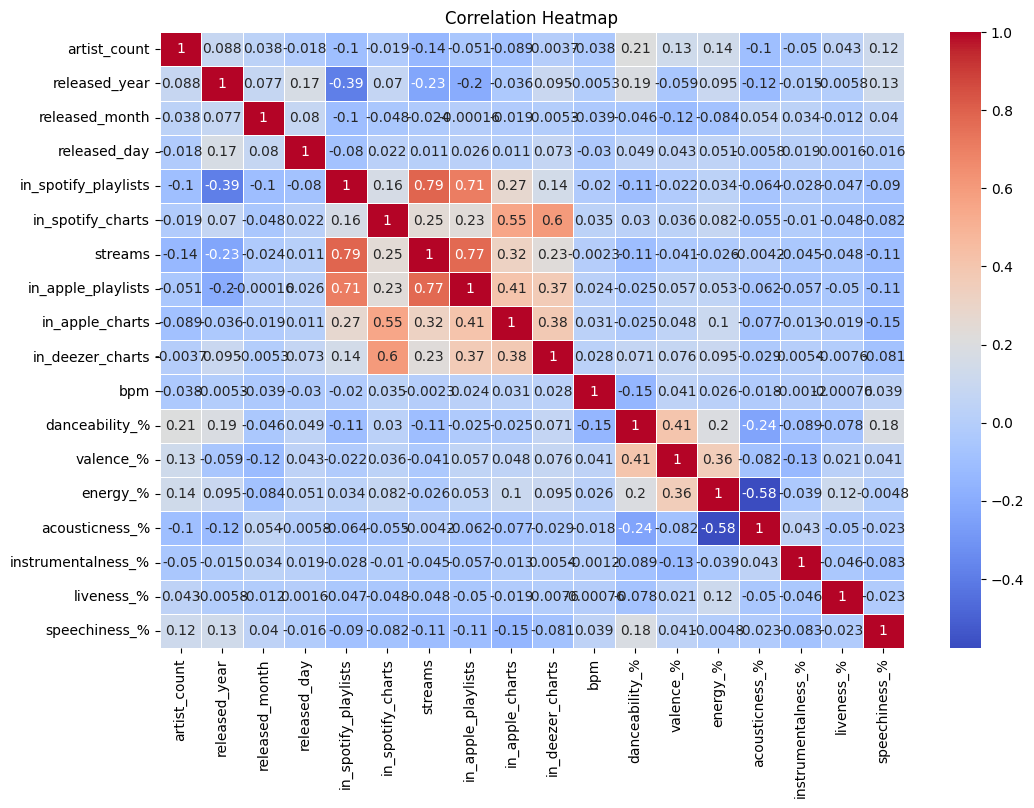

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

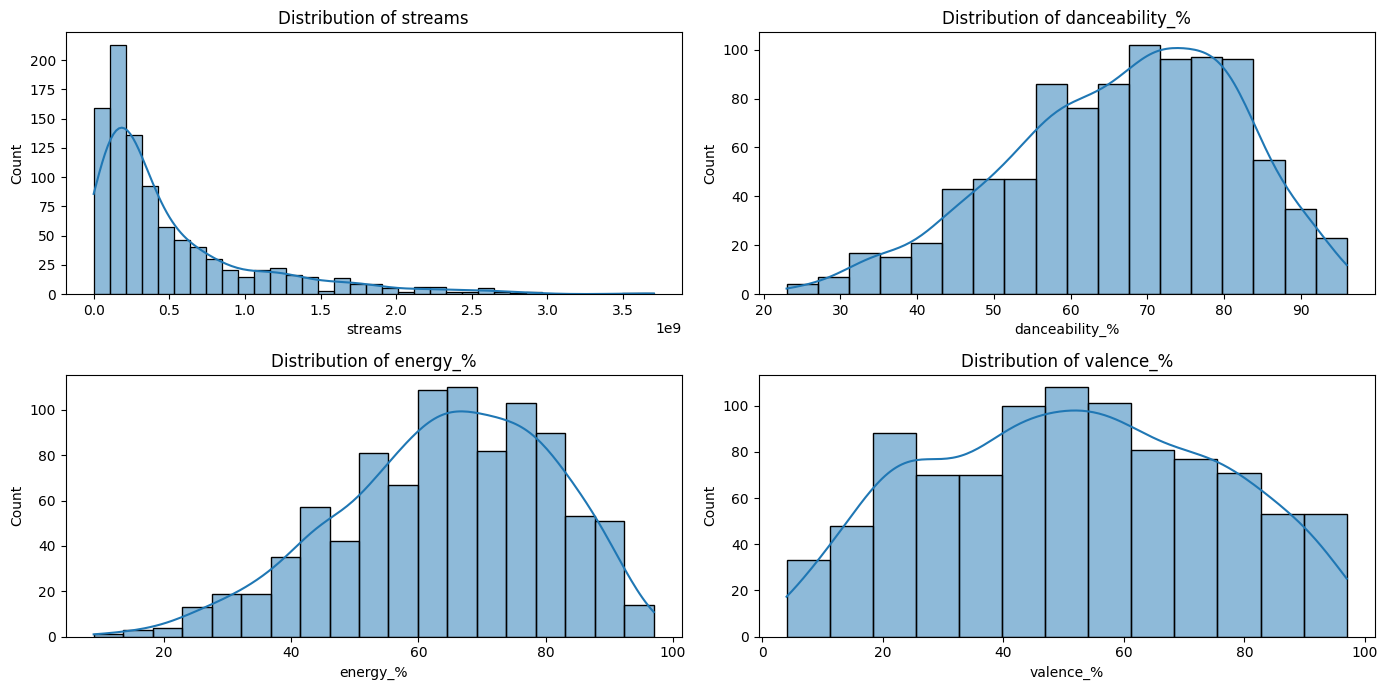

In [21]:
plt.figure(figsize=(14, 7))
for i, column in enumerate(['streams', 'danceability_%', 'energy_%', 'valence_%']):
    plt.subplot(2, 2, i+1)
    sns.histplot(spotify_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Feature Engineering

In [22]:
spotify_data['release_date'] = pd.to_datetime(spotify_data[['released_year', 'released_month', 'released_day']].rename(columns={
    'released_year': 'year', 'released_month': 'month', 'released_day': 'day'
}))

spotify_data['days_since_release'] = (pd.to_datetime('today') - spotify_data['release_date']).dt.days

# Dropping irrelevant or redundant features
spotify_data.drop(['track_name', 'artist(s)_name', 'release_date', 'cover_url'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
spotify_data = pd.get_dummies(spotify_data, drop_first=True)

#Data split for modelling

In [24]:
X = spotify_data.drop('streams', axis=1)
y = spotify_data['streams']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model 1: Linear Regression

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Model 2: Random Forest Regressor

In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 3: Gradient Boosting Regressor

In [27]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

#Model Evalvuation

In [28]:
models = {'Linear Regression': (y_pred_lr, lr_model),
          'Random Forest': (y_pred_rf, rf_model),
          'Gradient Boosting': (y_pred_gb, gb_model)}

for model_name, (y_pred, model) in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R^2 Score: {r2:.4f}\n")

Linear Regression RMSE: 35350671440120169627648.00
Linear Regression R^2 Score: -4612552715026074965207154688.0000

Random Forest RMSE: 229572628.60
Random Forest R^2 Score: 0.8055

Gradient Boosting RMSE: 235075389.60
Gradient Boosting R^2 Score: 0.7960



In [29]:
# Choose the best model based on R^2 and RMSE
best_model_name = max(models, key=lambda name: r2_score(y_test, models[name][0]))
best_model = models[best_model_name][1]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


#Feature Importance Analysis for the best model

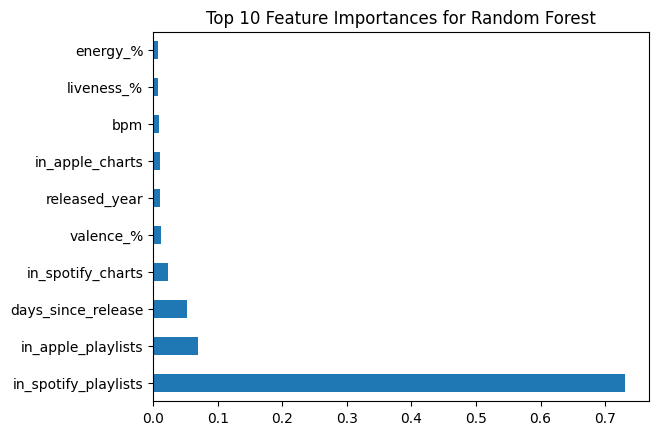

In [30]:
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title(f'Top 10 Feature Importances for {best_model_name}')
    plt.show()

#Predicting future Trends

In [31]:
future_data = pd.DataFrame({
    'artist_count': [1],
    'released_year': [2024],
    'released_month': [9],
    'released_day': [1],
    'in_spotify_playlists': [100],
    'in_spotify_charts': [10],
    'in_apple_playlists': [50],
    'in_apple_charts': [5],
    'in_deezer_charts': [2],
    'bpm': [120],
    'danceability_%': [80],
    'valence_%': [70],
    'energy_%': [65],
    'acousticness_%': [15],
    'instrumentalness_%': [0],
    'liveness_%': [10],
    'speechiness_%': [5],
    'days_since_release': [(pd.to_datetime('today') - pd.to_datetime('2024-09-01')).days]
})
future_data = pd.get_dummies(future_data, drop_first=True)
future_data = future_data.reindex(columns=X.columns, fill_value=0)

future_prediction = best_model.predict(future_data)
print(f"Predicted streams for the new track: {future_prediction[0]:.2f}")

Predicted streams for the new track: 38415366.41
